<a href="https://colab.research.google.com/github/antonschneider90/fed-rates/blob/master/Fed_rates_Altair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Update: I added an animated graph over time at the bottom of the document.
- I used a publicly available dataset of historic federal reserve rates and unemployment rates (source: Kaggle https://www.kaggle.com/federalreserve/interest-rates).
- The idea is to show how the the fed rate and unemployment rate developed over time using different visualizations.
- Please click on the colab link to see visualizations that are not shown on github

In [0]:
import altair as alt
from altair import Chart
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
fed_data = pd.read_csv('https://raw.githubusercontent.com/antonschneider90/fed-rates/master/interest-rates-fed.csv')

In [3]:
fed_data.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN


In [4]:
Chart(fed_data).mark_point().encode(
    x='Year:N',
    y='Effective Federal Funds Rate:Q'
   ).properties(
    title='U.S. Effective Federal Funds Rates 1954-2017'
)

alt.Chart(...)

In [5]:
Chart(fed_data).mark_bar().encode(
    x='Year:N',
    y='average(Effective Federal Funds Rate)'
)

alt.Chart(...)

In [6]:
base = alt.Chart(fed_data).encode(x='Year:O')

bar = base.mark_bar().encode(y='Effective Federal Funds Rate:Q')

line =  base.mark_line(color='red').encode(
    y='Unemployment Rate:Q'
    ).properties(
    title='The Federal Reserve - The Secret Job Creator of the U.S.?'
)

(bar + line).properties(width=600)

alt.LayerChart(...)

In [7]:
year_rate = Chart(fed_data).mark_point().encode(
    x='Year:N',
    y='Effective Federal Funds Rate:Q'
)

year_unemp = Chart(fed_data).mark_point().encode(
    x='Year:N',
    y='Unemployment Rate:Q'
)

year_rate | year_unemp

alt.HConcatChart(...)

In [8]:
#By using the 'brush' function in Altair, we can split the data in two graphs. 

#Select an area (holding your mouse) on the left graph (fed rates) and the right graph will show the corresponding datapoints (unemployment rate)

import altair as alt

brush = alt.selection(type='interval')


year_rate = alt.Chart(fed_data).mark_point().encode(
    x='Year:N',
    y='Effective Federal Funds Rate:Q'

).add_selection(brush)

year_unemp = alt.Chart(fed_data).mark_point().encode(
    x='Year:N',
    y='Unemployment Rate:Q'
).transform_filter(
    brush
)

year_rate | year_unemp

alt.HConcatChart(...)

In [0]:
import matplotlib as mp
import math
import matplotlib.patches as patches
import matplotlib.animation as animation
import matplotlib.ticker as ticker
from matplotlib.patches import Polygon
from IPython.display import HTML
mp.rcParams['animation.embed_limit'] = 2**128
from google.colab import files

In [0]:
#NEXT STEPS: a) define df with only two variables (rate and year) using ax.set and ax.plot and b) plot animation using the animation.FuncAnimation

In [11]:
df = pd.DataFrame(fed_data, columns = ['Year', 'Effective Federal Funds Rate']) 
print(df.head())

   Year  Effective Federal Funds Rate
0  1954                          0.80
1  1954                          1.22
2  1954                          1.06
3  1954                          0.85
4  1954                          0.83


In [14]:
def print_rates(current_year):
  record = df[df['Year'] <= current_year]
  print(record)

print_rates(2017)

     Year  Effective Federal Funds Rate
0    1954                          0.80
1    1954                          1.22
2    1954                          1.06
3    1954                          0.85
4    1954                          0.83
..    ...                           ...
899  2016                           NaN
900  2017                          0.65
901  2017                          0.66
902  2017                           NaN
903  2017                           NaN

[904 rows x 2 columns]


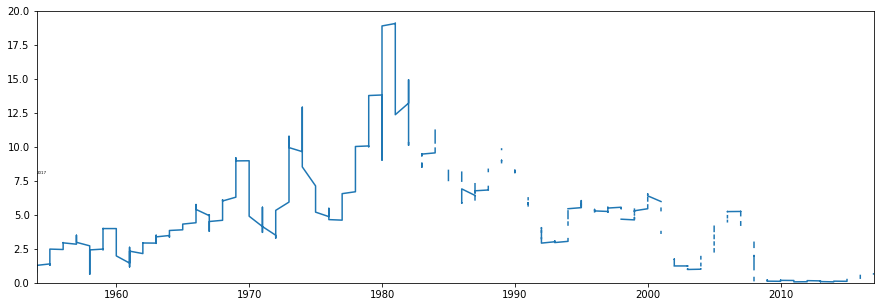

In [27]:
figure_w, ax = plt.subplots(figsize = (15, 5))

def show_rates(current_year):
  ax.clear()
  ax.set_xlim(1954, 2017)
  ax.set_ylim(0, 20)

  record = df[df['Year'] <= current_year]

  ax.plot(record['Year'], record['Effective Federal Funds Rate'])

  ax.text(1954, 8, current_year, size = 4)

show_rates(2017)

In [28]:
animator = animation.FuncAnimation(figure_w, show_rates, frames = range(1954, 2017), interval = 200, repeat = True)
HTML(animator.to_jshtml())